<a href="https://colab.research.google.com/github/johnreyes96/artificial-vision/blob/master/src/main/python/classes/ImagesCutAndScale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar numpy para dar soporte a:
# Concatenación de matrices - np.concatenate
import numpy as np
import math

# Importar el módulo cv2 de la librería opencv
import cv2
from google.colab.patches import cv2_imshow

# Soporte para visualización.
import matplotlib.pyplot as plt

(a.) Enlazar Google Drive y cargar imagen en variable.

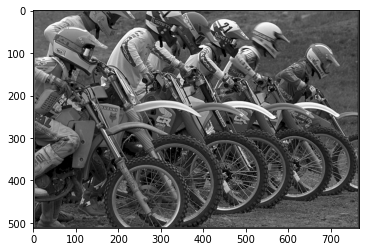

In [ ]:
# Se debe conectar con el Drive, y luego buscar la ruta correcta para leer la imagen
inputIm = cv2.imread('/content/drive/MyDrive/vision_artificial/images/kodim05.png',cv2.IMREAD_GRAYSCALE)
plotInputIm = plt.imshow(inputIm, cmap="gray")

(b.) Cambiar el tamaño de una imagen, usando cv2.resize. Cambiar tamaño = escalamiento.
Referencia:

https://docs.opencv.org/3.4/da/d6e/tutorial_py_geometric_transformations.html

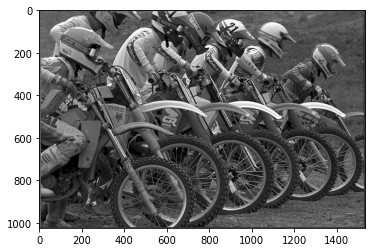

In [ ]:
# Note que este enfoque es uno de los dos posibles sugeridos en la página arriba. 
# En este caso el nuevo tamaño de la imagen se especifica de forma manual.

# Enfoque 1. Note que en este caso, el tamaño final es menor que el de la imagen de entrada.
# resizedIm = cv2.resize(inputIm, (100, 100), interpolation=cv2.INTER_AREA) # Prestar atención



# Enfoque 2. En este caso, la imagen final va a tener un tamaño mayor al de la imagen de entrada.
# resizedIm = cv2.resize(inputIm,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)


# Otra versión, donde primero se calculan y almacenan en variables, el alto y el ancho de la imagen.
height, width = inputIm.shape[:2]
kScalar = 2
resizedIm = cv2.resize(inputIm,(kScalar*width, kScalar*height), interpolation = cv2.INTER_CUBIC)

plotresizeIm = plt.imshow(resizedIm, cmap="gray")

(c.) ¿Cómo organizar para el caso en que se requiera reducir el tamaño a un fracción, en principio un número no entero?

El caso donde se aumenta a una parte en específico de una imagen, se conoce usualmente como zoom. Implemente un zoom para una ROI de la imagen seleccionada a mano. Considere por ejemplo hacer zoom a las letras con el modelo de la 3ra moto; de izquierda a derecha.

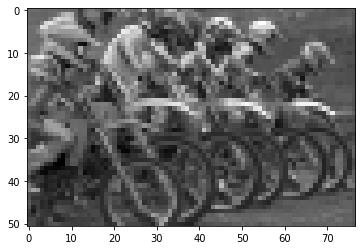

In [ ]:
height, width = inputIm.shape[:2]
kScalar = 0.1
newRowSize = math.trunc(np.around(kScalar*width))
newColSize = int(np.around(kScalar*height))
resizedIm = cv2.resize(inputIm,(newRowSize, newColSize), interpolation = cv2.INTER_AREA)

plotresizeIm = plt.imshow(resizedIm, cmap="gray")

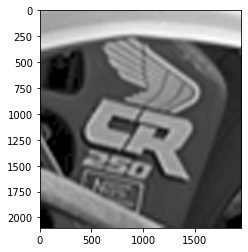

In [ ]:
# Recorte de imagen
width = 275
height = 220
x = 65
y = 70
crop_img = inputIm[height:height + y, width:width + x]

# Ampliar imagen
height, width = crop_img.shape[:2]
kScalar = 30
resizedIm = cv2.resize(crop_img,(kScalar * width, kScalar * height), interpolation = cv2.INTER_CUBIC)

plotInputIm = plt.imshow(resizedIm, cmap="gray", interpolation='bilinear', aspect='equal')

(e.) Traslación de una imagen. Implica un desplazamiento geométrico de las coordendas de los píxeles en una imagen. Matemáticamente, se obtiene operando una matriz de entrada, con una matriz de transformación cuya forma es la siguiente: 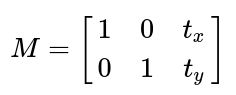

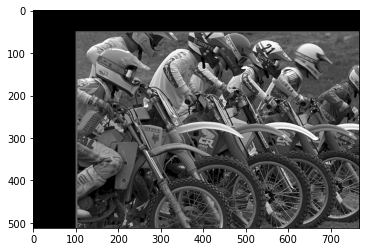

In [ ]:
rows,cols = inputIm.shape
Tx = 100
Ty = 50
M = np.float32([[1,0,Tx],[0,1,Ty]])
xyShiftedIm = cv2.warpAffine(inputIm,M,(cols,rows))

plotresizeIm = plt.imshow(xyShiftedIm, cmap="gray")

(f.) 

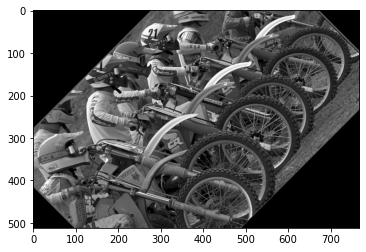

In [ ]:
nFilas,nCols = inputIm.shape
# cols-1 and rows-1 are the coordinate limits.

# Sintáxis: c2v.getRotationMatrix2D(center,angle,scale): 
#           https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#gafbbc470ce83812914a70abfb604f4326 
M = cv2.getRotationMatrix2D(((nCols - 1) / 2.0, (nFilas - 1) / 2.0), 45, 1.0)
rotatedIm = cv2.warpAffine(inputIm,M,(nCols,nFilas))

plotresizeIm = plt.imshow(rotatedIm, cmap="gray")

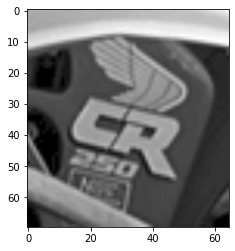

In [ ]:
inputIm = cv2.imread('/content/drive/MyDrive/vision_artificial/images/kodim05.png',cv2.IMREAD_GRAYSCALE)
plotInputIm = plt.imshow(inputIm, cmap="gray")
# Recorte de imagen
width = 275
height = 220
x = 65
y = 70
crop_img = inputIm[height:height + y, width:width + x]

# Ampliar imagen
height, width = crop_img.shape[:2]
kScalar = 1
resizedIm = cv2.resize(crop_img,(kScalar * width, kScalar * height), interpolation = cv2.INTER_CUBIC)

plotInputIm = plt.imshow(resizedIm, cmap="gray", interpolation='bilinear', aspect='equal')

inputIm[filaInicial:finalFinal, colInicial:colFinal]=ROI
inputIm[412:512, 668:768]=ROI
len(412:512)

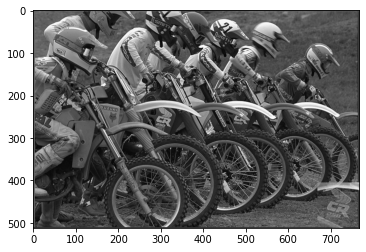

In [ ]:
from PIL import Image, ImageDraw, ImageFilter

im1 = Image.open('/content/drive/MyDrive/vision_artificial/images/kodim05.png')

inputIm = cv2.imread('/content/drive/MyDrive/vision_artificial/images/kodim05.png',cv2.IMREAD_GRAYSCALE)
crop_im2 = plt.imshow(inputIm, cmap="gray")
# Recorte de imagen
width = 275
height = 220
x = 65
y = 70
crop_img = inputIm[height:height + y, width:width + x]

# Ampliar imagen
height, width = crop_img.shape[:2]
kScalar = 30
resizedIm = cv2.resize(crop_img,(kScalar * width, kScalar * height), interpolation = cv2.INTER_CUBIC)
cv2.imwrite('/content/drive/MyDrive/vision_artificial/images/logo.png',resizedIm)
im2 = Image.open('/content/drive/MyDrive/vision_artificial/images/logo.png')


basewidth = 100 # set new width
wpercent = (basewidth / float(im2.size[0]))
hsize = int((float(im2.size[1]) * float(wpercent)))
im2 = im2.resize((basewidth, hsize), Image.ANTIALIAS) # scale image

width_im1, height_im1 = im1.size
width_im2, height_im2 = im2.size

im1.paste(im2, (width_im1 - width_im2, height_im1 - height_im2), im2) # set im2 in corner
im1.save('/content/drive/MyDrive/vision_artificial/images/kodim05_with_logo.png', quality=95)

composition = cv2.imread('/content/drive/MyDrive/vision_artificial/images/kodim05_with_logo.png', cv2.IMREAD_GRAYSCALE)
imgplotGG = plt.imshow(composition, cmap="gray")